### **Identifying patterns and risk factors of alcohol and drug use**

In this project, we have explored the impact of alcohol use and drug use on health conditions of people.

We have considered datasets for the following years:

* 2011 - 2012
* 2013 - 2014
* 2015 - 2016
* 2017 - 2018

#### **Preliminary Step**

##### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
mode_imputer = SimpleImputer(strategy='most_frequent')

#### **Data Cleaning**

##### **Demographics dataset**

The demographics file provides individual, family, and household-level information on the following topics:

* Survey participant’s household interview and examination status
* Interview and examination sample weights
* Masked variance units
* Language of questionnaires used for the interviews conducted in the household and in the mobile examination center
* Use of proxy or interpreter during the interviews
* The six-month time period when the examination was performed
* Pregnancy status
* Household and family income
* Household and family size
* Household composition:
* The number of children (aged 5 years or younger and 6-17 years old) in the household
The number of adults aged 60 years or older in the household
* Demographic information about the household reference person
* Other selected demographic information:
  - Gender
  - Age
  - Race/Hispanic origin
  - Education
  - Marital status
  - Military service status
  - Country of birth
  - Citizenship
  - Years of U.S. residence

In [3]:
#importing demo data
demo_g = pd.read_sas('Demographics/2011-2012/DEMO_G.XPT')
demo_h = pd.read_sas('Demographics/2013-2014/DEMO_H.XPT')
demo_i = pd.read_sas('Demographics/2015-2016/DEMO_I.XPT')
demo_j = pd.read_sas('Demographics/2017-2018/DEMO_J.XPT')

In [4]:
#finding common columns
common_columns = list(set(demo_g.columns) & set(demo_h.columns) & set(demo_i.columns) & set(demo_j.columns))

# Filter DataFrames to keep only the common columns in the same order
demo_g_common = demo_g[common_columns]
demo_h_common = demo_h[common_columns]
demo_i_common = demo_i[common_columns]
demo_j_common = demo_j[common_columns]

# Concatenate DataFrames
concatenated_df = pd.concat([demo_g_common, demo_h_common, demo_i_common, demo_j_common], ignore_index=True)

# Reorder columns to bring 'SEQN' as the first column
concatenated_df = concatenated_df[['SEQN'] + [col for col in concatenated_df if col != 'SEQN']]

demo = concatenated_df[['SEQN', 'RIDAGEYR', 'RIAGENDR','DMDEDUC2', 'DMDMARTL']]

In [5]:
# removing invalid values
for col in demo:
    demo.drop(demo[(demo[col] == 7) | (demo[col] == 9) | (demo[col]==77) | (demo[col]==99)].index, inplace=True)

C:\Users\mansira\AppData\Local\Temp\ipykernel_16216\2177395282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo.drop(demo[(demo[col] == 7) | (demo[col] == 9) | (demo[col]==77) | (demo[col]==99)].index, inplace=True)


In [6]:
#mode imputation
mode_imputer.fit(demo)
demo_imputed = mode_imputer.transform(demo)
imputed_demo = pd.DataFrame(demo_imputed, columns=demo.columns)
imputed_demo

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,DMDMARTL
0,62161.0,22.0,1.0,3.0,5.0
1,62162.0,3.0,2.0,4.0,1.0
2,62163.0,14.0,1.0,4.0,1.0
3,62164.0,44.0,2.0,4.0,1.0
4,62165.0,14.0,2.0,4.0,1.0
...,...,...,...,...,...
37219,102952.0,70.0,2.0,3.0,1.0
37220,102953.0,42.0,1.0,3.0,4.0
37221,102954.0,41.0,2.0,5.0,5.0
37222,102955.0,14.0,2.0,4.0,1.0


#### Questionnaire Dataset

NHANES administered two questionnaires to the participants, one in the household, and one in the Mobile Examination Center (MEC).

The Questionnaire Data includes 44 Datasets, of which we will consider for this project:

* Alcohol Use
* Drug Use
* Current Health Status
* Smoking - Cigarette Use
* Cardiovascular Health

##### **Alcohol Use Dataset**

The Alcohol Use Questionnaire (variable name prefix ALQ) focuses on lifetime and current use (past 12 months).

In [7]:
#importing alcohol data
alq_g = pd.read_sas('Questionnaire/2011-2012/ALQ_G.XPT')
alq_h = pd.read_sas('Questionnaire/2013-2014/ALQ_H.XPT')
alq_i = pd.read_sas('Questionnaire/2015-2016/ALQ_I.XPT')
alq_j = pd.read_sas('Questionnaire/2017-2018/ALQ_J.XPT')

In [8]:
# renaming columns with different codes
alq_j = alq_j.rename(columns={'ALQ121':'ALQ120Q', 'ALQ142':'ALQ141Q'})

In [9]:
#finding common columns
common_columns = list(set(alq_g.columns) & set(alq_h.columns) & set(alq_i.columns) & set(alq_j.columns))

# Filter DataFrames to keep only the common columns in the same order
alq_g_common = alq_g[common_columns]
alq_h_common = alq_h[common_columns]
alq_i_common = alq_i[common_columns]
alq_j_common = alq_j[common_columns]

# Concatenate DataFrames
alcohol = pd.concat([alq_g_common, alq_h_common, alq_i_common, alq_j_common], ignore_index=True)

# Reorder columns to bring 'SEQN' as the first column
alcohol = alcohol[['SEQN'] + [col for col in alcohol if col != 'SEQN']]

In [10]:
#removing invalid values
for col in alcohol:
    alcohol.drop(alcohol[(alcohol[col] == 7) | (alcohol[col] == 9) | (alcohol[col] == 777) | (alcohol[col] == 999)].index, inplace = True)

In [11]:
# replacing missing values with 0
alcohol['ALQ141Q'].fillna(0, inplace=True)
alcohol['ALQ120Q'].fillna(0, inplace=True)
alcohol['ALQ120Q'] = alcohol['ALQ120Q'].round().astype(int)
alcohol['ALQ141Q'] = alcohol['ALQ141Q'].round().astype(int)

In [12]:
# mode imputation
mode_imputer.fit(alcohol)
alcohol_imputed = mode_imputer.transform(alcohol)
imputed_alcohol = pd.DataFrame(alcohol_imputed, columns=alcohol.columns)
imputed_alcohol


,SEQN,ALQ130,ALQ141Q,ALQ151,ALQ120Q
0,62161.0,1.0,0.0,2.0,0.0
1,62164.0,1.0,0.0,2.0,0.0
2,62169.0,2.0,1.0,2.0,1.0
3,62172.0,3.0,1.0,2.0,2.0
4,62174.0,1.0,0.0,2.0,0.0
...,...,...,...,...,...
20859,102949.0,1.0,0.0,2.0,0.0
20860,102952.0,1.0,0.0,2.0,0.0
20861,102953.0,12.0,6.0,2.0,6.0
20862,102954.0,1.0,0.0,2.0,0.0


##### **Drug Use Dataset**

The Drug Use questionnaire (variable name prefix DUQ) focuses on lifetime and current use of marijuana or hashish, cocaine, heroin, and methamphetamine, as well as intravenous use of these and other drugs.

In [13]:
duq_g = pd.read_sas('Questionnaire/2011-2012/DUQ_G.XPT')
duq_h = pd.read_sas('Questionnaire/2013-2014/DUQ_H.XPT')
duq_i = pd.read_sas('Questionnaire/2015-2016/DUQ_I.XPT')
duq_j = pd.read_sas('Questionnaire/2017-2018/DUQ_J.XPT')

In [14]:
# finding common columns
common_columns = list(set(duq_g.columns) & set(duq_h.columns) & set(duq_i.columns) & set(duq_j.columns))

# Filter DataFrames to keep only the common columns in the same order
duq_g_common = duq_g[common_columns]
duq_h_common = duq_h[common_columns]
duq_i_common = duq_i[common_columns]
duq_j_common = duq_j[common_columns]

# Concatenate DataFrames
drug = pd.concat([duq_g_common, duq_h_common, duq_i_common, duq_j_common], ignore_index=True)

# Reorder columns to bring 'SEQN' as the first column
drug = drug[['SEQN'] + [col for col in drug if col != 'SEQN']]

# selecting columns of interest
drug = drug[['SEQN',     # Participant ID
                 'DUQ200',   # Ever used marijuana or hashish
                 'DUQ211',   # Used marijuana every month for a year?
                 'DUQ217',   # How often would you use marijuana?
                 'DUQ219',   # How many joints or pipes smoke in a day?
                 'DUQ272',   # Num of time you used cocaine
                 'DUQ352'    # Num times used methamphetamine
                ]]

In [15]:
# removing invalid values
for col in drug:
    drug.drop(drug[(drug[col] == 7) | (drug[col] == 9)].index, inplace = True)

In [16]:
# replacing missing values with 0 in a few columns and 2 in others
columns_to_fill = ['DUQ217', 'DUQ219', 'DUQ272', 'DUQ352']
drug[columns_to_fill] = drug[columns_to_fill].fillna(0)
drug['DUQ211'] = drug['DUQ211'].fillna(2)
drug['DUQ200'] = drug['DUQ200'].fillna(2)

In [17]:
# mode imputation
mode_imputer.fit(drug)
drug_imputed = mode_imputer.transform(drug)
imputed_drug = pd.DataFrame(drug_imputed, columns=drug.columns)
imputed_drug

,SEQN,DUQ200,DUQ211,DUQ217,DUQ219,DUQ272,DUQ352
0,62161.0,2.0,2.0,0.0,0.0,0.0,0.0
1,62164.0,2.0,2.0,0.0,0.0,0.0,0.0
2,62169.0,1.0,2.0,0.0,0.0,0.0,0.0
3,62172.0,1.0,2.0,0.0,0.0,0.0,0.0
4,62176.0,1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
19202,102948.0,2.0,2.0,0.0,0.0,0.0,0.0
19203,102949.0,1.0,1.0,3.0,1.0,3.0,2.0
19204,102953.0,2.0,2.0,0.0,0.0,0.0,0.0
19205,102954.0,2.0,2.0,0.0,0.0,0.0,0.0


##### **Smoking - Cigarette Use Dataset**

The Smoking - Cigarette Use (variable name prefix SMQ) dataset provides a history of cigarette use, age at initiation, past 30-day use, cigarette brand, sub-brand and other related details.

In [18]:
smq_g = pd.read_sas('Questionnaire/2011-2012/SMQ_G.XPT')
smq_h = pd.read_sas('Questionnaire/2013-2014/SMQ_H.XPT')
smq_i = pd.read_sas('Questionnaire/2015-2016/SMQ_I.XPT')
smq_j = pd.read_sas('Questionnaire/2017-2018/SMQ_J.XPT')

In [19]:
# finding common columns
common_columns = list(set(smq_g.columns) & set(smq_h.columns) & set(smq_i.columns) & set(smq_j.columns))

# Filter DataFrames to keep only the common columns in the same order
smq_g_common = smq_g[common_columns]
smq_h_common = smq_h[common_columns]
smq_i_common = smq_i[common_columns]
smq_j_common = smq_j[common_columns]

# Concatenate DataFrames
smoking = pd.concat([smq_g_common, smq_h_common, smq_i_common, smq_j_common], ignore_index=True)

# Reorder columns to bring 'SEQN' as the first column
smoking = smoking[['SEQN'] + [col for col in smoking if col != 'SEQN']]

# selecting columns of interest
smoking = smoking[['SEQN',    # Partecipant ID
                 'SMQ040',  # Do you now smoke cigarettes?
                 'SMD641',  # Num days smoked cigs during past 30 days
                 'SMD650'   # Avg # cigarettes/day during past 30 days
                ]]

In [20]:
# removing invalid values
for col in smoking:
    smoking.drop(smoking[(smoking[col] == 7) | (smoking[col] == 9) | (smoking[col] == 77) | (smoking[col] == 99) | (smoking[col] == 777) | (smoking[col] == 999)].index, inplace = True)


In [21]:
# mode imputation
mode_imputer.fit(smoking)
smoking_imputed = mode_imputer.transform(smoking)
imputed_smoking = pd.DataFrame(smoking_imputed, columns=smoking.columns)
imputed_smoking

,SEQN,SMQ040,SMD641,SMD650
0,62161.0,3.0,30.0,10.0
1,62163.0,3.0,30.0,10.0
2,62164.0,3.0,30.0,10.0
3,62165.0,3.0,30.0,10.0
4,62169.0,3.0,30.0,10.0
...,...,...,...,...
27423,102952.0,3.0,30.0,10.0
27424,102953.0,3.0,30.0,10.0
27425,102954.0,3.0,30.0,10.0
27426,102955.0,3.0,30.0,10.0


##### **Current Health Status Dataset**

The Current Health Status section (variable name prefix HSQ) provides personal interview data on overall health assessment, recent illness (past 30 days), blood donation, and HIV testing.

In [22]:
hsq_g = pd.read_sas('Questionnaire/2011-2012/HSQ_G.XPT')
hsq_h = pd.read_sas('Questionnaire/2013-2014/HSQ_H.XPT')
hsq_i = pd.read_sas('Questionnaire/2015-2016/HSQ_I.XPT')
hsq_j = pd.read_sas('Questionnaire/2017-2018/HSQ_J.XPT')

In [23]:
# finding common columns
common_columns = list(set(hsq_g.columns) & set(hsq_h.columns) & set(hsq_i.columns) & set(hsq_j.columns))

# Filter DataFrames to keep only the common columns in the same order
hsq_g_common = hsq_g[common_columns]
hsq_h_common = hsq_h[common_columns]
hsq_i_common = hsq_i[common_columns]
hsq_j_common = hsq_j[common_columns]

# Concatenate DataFrames
heath_status = pd.concat([hsq_g_common, hsq_h_common, hsq_i_common, hsq_j_common], ignore_index=True)

# Reorder columns to bring 'SEQN' as the first column
heath_status = heath_status[['SEQN'] + [col for col in heath_status if col != 'SEQN']]

# selecting columns of interest
heath_status = heath_status[['SEQN',    # Participant ID
                 'HSD010'   # General health condition
                ]]

In [24]:
# removing invalid values
for col in heath_status:
    heath_status.drop(heath_status[(heath_status[col] == 7) | (heath_status[col] == 9)].index, inplace = True)

In [25]:
# mode imputation
mode_imputer.fit(heath_status)
hs_imputed = mode_imputer.transform(heath_status)
imputed_hs = pd.DataFrame(hs_imputed, columns=heath_status.columns)
imputed_hs

,SEQN,HSD010
0,62161.0,3.0
1,62162.0,3.0
2,62163.0,3.0
3,62164.0,3.0
4,62165.0,4.0
...,...,...
35899,102952.0,2.0
35900,102953.0,4.0
35901,102954.0,3.0
35902,102955.0,2.0


#### **Cardiovascular Health Dataset**

The Cardiovascular Disease and Health section (variable name prefix CDQ) provides participant-level interview data on evaluating cardiovascular health and includes questions to assess the presence of angina pectoris as defined by the Rose questionnaire.

In [26]:
cdq_g = pd.read_sas('Questionnaire/2011-2012/CDQ_G.XPT')
cdq_h = pd.read_sas('Questionnaire/2013-2014/CDQ_H.XPT')
cdq_i = pd.read_sas('Questionnaire/2015-2016/CDQ_I.XPT')
cdq_j = pd.read_sas('Questionnaire/2017-2018/CDQ_J.XPT')

In [27]:
# finding common columns
common_columns = list(set(cdq_g.columns) & set(cdq_h.columns) & set(cdq_i.columns) & set(cdq_j.columns))

# Filter DataFrames to keep only the common columns in the same order
cdq_g_common = cdq_g[common_columns]
cdq_h_common = cdq_h[common_columns]
cdq_i_common = cdq_i[common_columns]
cdq_j_common = cdq_j[common_columns]

# Concatenate DataFrames
cardio = pd.concat([cdq_g_common, cdq_h_common, cdq_i_common, cdq_j_common], ignore_index=True)

# Reorder columns to bring 'SEQN' as the first column
cardio = cardio[['SEQN'] + [col for col in cardio if col != 'SEQN']]

# selecting columns of interest
cardio = cardio[['SEQN',     # Partecipant ID
                 'CDQ001',   # Partecipant ever had pain or discomfort in chest
                 'CDQ002',   # Partecipant get it walking uphill or in a hurry
                 'CDQ003',   # During an ordinary pace on level ground
                 'CDQ008',   # Severe pain in chest for more than half hour
                 'CDQ010'    # Shortness of breath on stairs or inclines
                ]]

In [28]:
# removing invalid values
for col in cardio:
    cardio.drop(cardio[(cardio[col] == 7) | (cardio[col] == 9)].index, inplace = True)

In [29]:
# mode imputation
mode_imputer.fit(cardio)
cardio_imputed = mode_imputer.transform(cardio)
imputed_cardio = pd.DataFrame(cardio_imputed, columns=cardio.columns)
imputed_cardio

,SEQN,CDQ001,CDQ002,CDQ003,CDQ008,CDQ010
0,62164.0,2.0,2.0,2.0,2.0,2.0
1,62172.0,2.0,2.0,2.0,2.0,2.0
2,62174.0,1.0,1.0,1.0,2.0,1.0
3,62177.0,2.0,2.0,2.0,2.0,2.0
4,62178.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...
14958,102947.0,2.0,2.0,2.0,2.0,1.0
14959,102950.0,2.0,2.0,2.0,2.0,1.0
14960,102952.0,2.0,2.0,2.0,2.0,2.0
14961,102953.0,1.0,2.0,2.0,1.0,2.0


##### **Merging the required dataframes for predicting the the effect of drug use on health**

In [30]:
drug_demo = imputed_drug.merge(imputed_demo, on='SEQN', how='inner')
drug_demo_hs = drug_demo.merge(imputed_hs, on='SEQN', how='inner')
drug_demo_hs_cardio = drug_demo_hs.merge(imputed_cardio, on='SEQN', how='inner')
drug_demo_hs_cardio

,SEQN,DUQ200,DUQ211,DUQ217,DUQ219,DUQ272,DUQ352,RIDAGEYR,RIAGENDR,DMDEDUC2,DMDMARTL,HSD010,CDQ001,CDQ002,CDQ003,CDQ008,CDQ010
0,62164.0,2.0,2.0,0.0,0.0,0.0,0.0,44.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0
1,62172.0,1.0,2.0,0.0,0.0,0.0,0.0,43.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0
2,62177.0,2.0,2.0,0.0,0.0,0.0,0.0,51.0,1.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0
3,62179.0,1.0,2.0,0.0,0.0,0.0,0.0,55.0,1.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
4,62199.0,1.0,2.0,0.0,0.0,3.0,0.0,57.0,1.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10777,102943.0,2.0,2.0,0.0,0.0,0.0,0.0,48.0,2.0,4.0,6.0,4.0,2.0,2.0,2.0,2.0,2.0
10778,102944.0,2.0,2.0,0.0,0.0,0.0,0.0,55.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
10779,102946.0,2.0,2.0,0.0,0.0,0.0,0.0,65.0,1.0,4.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0
10780,102953.0,2.0,2.0,0.0,0.0,0.0,0.0,42.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,1.0,2.0


In [31]:
drug_demo_hs_cardio.DUQ219.value_counts()

DUQ219
0.0    9353
1.0     629
2.0     437
3.0     286
4.0      77
Name: count, dtype: int64

In [32]:
drug_demo_hs_cardio.to_csv('final_drug.csv')

#### **Modelling using a variable in the Drug dataset as the target**

In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder


In [35]:
data = drug_demo_hs_cardio.astype('int')

#label encoding
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in data.columns:
    # Apply label encoding only to columns with object dtype (categorical columns)
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])
        # Convert encoded values to pandas categorical type
        data[col] = data[col].astype('category')

In [36]:
# selection features and target variables
X = data.drop(['SEQN', 'DUQ219'], axis=1)
y = data['DUQ219']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Random Forest Classifier Accuracy: 0.9443671766342142
F1 Score: 0.9435280668408215


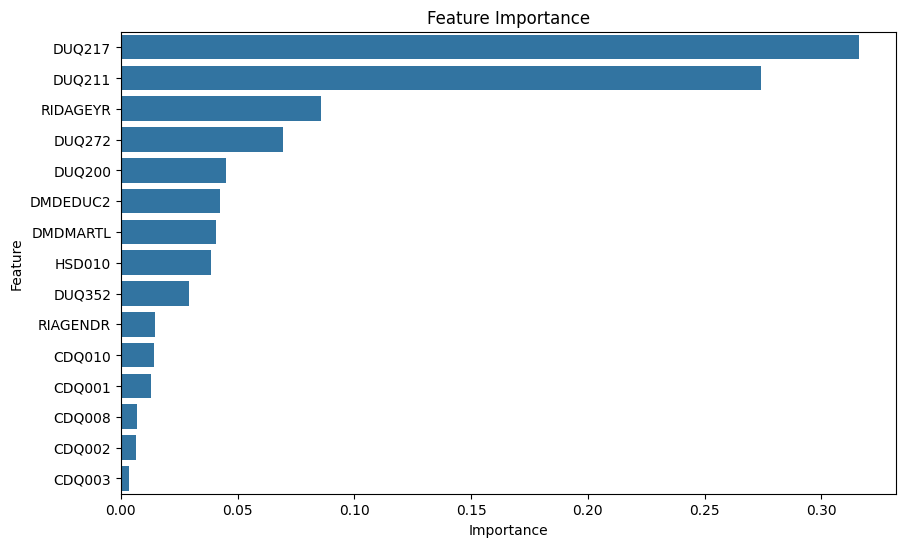

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
# Create the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

c:\Users\mansira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9123783031988874
F1 Score: 0.91069920343912


In [39]:
# Create the SVM Classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

SVM Accuracy: 0.933240611961057
F1 Score: 0.9145772547257985


##### **Applying KFold Cross-Validation to SVC to check if there's an increase in its accuracy or not**

In [40]:
from sklearn.model_selection import cross_val_score, KFold

# Define the SVM Classifier
svm_classifier = SVC()

# Define the number of folds for cross-validation
k_folds = 5

# Perform k-fold cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_accuracy = cross_val_score(svm_classifier, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1 = cross_val_score(svm_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')

# Print the results
print("Cross-Validation Results (Accuracy):")
print(cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())
print("\nCross-Validation Results (F1 Score):")
print(cv_f1)
print("Mean F1 Score:", cv_f1.mean())


Cross-Validation Results (Accuracy):
[0.90898551 0.91072464 0.91188406 0.92347826 0.91884058]
Mean Accuracy: 0.9147826086956522

Cross-Validation Results (F1 Score):
[0.88612345 0.88900808 0.88832985 0.90518258 0.89661479]
Mean F1 Score: 0.893051750352436


In [41]:
# label encoding for XGBoost
xgb_data = data.copy()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

XGBoost Accuracy: 0.9471488178025035
F1 Score: 0.9472554828851314


##### **Modelling by removing a few not so important features**

In [44]:
# Selecting features and target variables
X = data.drop(['SEQN', 'DUQ219','DMDEDUC2','CDQ002','CDQ003','HSD010','CDQ001'], axis=1)
y = data['DUQ219']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Random Forest Classifier Accuracy: 0.9420491423273064
F1 Score: 0.942970445712724


In [45]:
# Create the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

AdaBoost Accuracy: 0.913769123783032
F1 Score: 0.9159450662449686


In [46]:
# Create the SVM Classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

SVM Accuracy: 0.932313398238294
F1 Score: 0.912585728665847


In [47]:
#label encoding for XGBoost
xgb_data = data.copy()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

XGBoost Accuracy: 0.9406583217431618
F1 Score: 0.9420164730545775


##### **Visualizations on the Drug Use dataset**

In [134]:
imputed_demo = imputed_demo.rename(columns={'SEQN' : 'Participant_id',
                            'RIDAGEYR' : 'Age', 
                            'RIAGENDR' : 'Gender',
                            'DMDEDUC2' : 'Education Level', 
                            'DMDMARTL' : 'Marital Status'})


imputed_demo['Gender'] = imputed_demo['Gender'].replace([1, 2], ['M', 'F'])

imputed_demo['Education Level'].replace([1, 2, 3, 4, 5], ['Less than 9th grade',
                                                        '9-11th grade', 
                                                        'High school - GED',
                                                        'College - AA',
                                                        'College or above'], inplace=True) 


imputed_demo['Age_ranges'] = pd.cut(imputed_demo['Age'], 
                                  bins=[0, 14, 29, 39, 49, 59, 69, 79, 80], 
                                  right=True, 
                                  labels=['0-17', 
                                            '18-29', 
                                            '30-39',
                                            '40-49',
                                            '50-59',
                                            '60-69',
                                            '70-79',
                                            '80+'], 
                                  include_lowest=True)


imputed_demo['Marital Status'].replace([1, 2, 3, 4, 5, 6], ['Married', 'Widowed', 'Divorced', 'Separated', 'Never Married', 'Living with Partner'], inplace = True)

imputed_demo.drop('Age', axis=1, inplace=True)




In [135]:
imputed_drug.rename(columns = {'SEQN'     : 'Participant_id', 
                             'DUQ200'   : 'Ever used marijuana Y-N',  
                             'DUQ211'   : 'Used marijuana every month Y-N',
                             'DUQ217'   : 'Frequency of marijuana use',
                             'DUQ219'   : 'Num daily joints',
                             'DUQ272'   : 'Frequency of cocaine use',
                             'DUQ352'   : 'Frequency of methamphetamine use'
                            }, inplace=True)


imputed_drug['Frequency of marijuana use'] = imputed_drug['Frequency of marijuana use'].replace([0, 1, 2, 3, 4, 5], 
                                                                        ['Never/Not disclosed',
                                                                         'Once per month',
                                                                         '2-3 times per month',
                                                                         '1-2 times per week',
                                                                         '3-6 times per week',
                                                                         'one or more times per day'
                                                                        ])

imputed_drug['Num daily joints'] = imputed_drug['Num daily joints'].replace([0, 1, 2, 3, 4], 
                                                                    ['Never/Not disclosed',
                                                                     '1 per day',
                                                                     '2 per day',
                                                                     '3-5 per day',
                                                                     '>6 per day'
                                                                    ])

col_stat = ['Frequency of cocaine use', 'Frequency of methamphetamine use']
for col in col_stat:
        imputed_drug[col] = imputed_drug[col].replace([0, 1, 2, 3, 4, 5, 6], 
                                          ['Never/Not disclosed',
                                           'Once',
                                           '2-5 times',
                                           '6-19 times',
                                           '20-49 times',
                                           '50-99 times',
                                           '>100 times'
                                        ])


In [136]:
imputed_smoking.rename(columns = {'SEQN'   : 'Participant_id', 
                             'SMQ040' : 'Smoke cigarettes Y-N',
                             'SMD641' : 'Days/mo smoked cigs',
                             'SMD650' : 'Num cigs/day'
                            }, inplace=True)

imputed_smoking['Smoke cigarettes Y-N'] = imputed_smoking['Smoke cigarettes Y-N'].replace([2, 3], 0)

In [137]:
imputed_hs.rename(columns = {'SEQN'   : 'Participant_id', 
                             'HSD010' : 'General health condition'
                            }, inplace=True)

imputed_hs['General health condition'] = imputed_hs['General health condition'].replace([1, 2, 3, 4, 5], 
                                                                        ['Excellent',
                                                                         'Very good',
                                                                         'Good',
                                                                         'Fair',
                                                                         'Poor'
                                                                        ])

In [138]:
imputed_cardio.rename(columns = {'SEQN'   : 'Participant_id', 
                             'CDQ001' : 'Ever had chest pain Y-N',  
                             'CDQ002' : 'Chest pain walking uphill/hurry Y-N',
                             'CDQ003' : 'Chest pain on level ground Y-N',
                             'CDQ008' : 'Severe pain in chest more than half hour Y-N',
                             'CDQ010' : 'Shortness of breath on stairs/inclines Y-N'
                            }, inplace=True)

yn_col = ['Ever had chest pain Y-N',  
              'Chest pain walking uphill/hurry Y-N',
              'Chest pain on level ground Y-N',
              'Severe pain in chest more than half hour Y-N',
              'Shortness of breath on stairs/inclines Y-N']
    
for col in yn_col:
        imputed_cardio[col] = imputed_cardio[col].replace(2, 0)

    

In [139]:
data = [imputed_demo, imputed_drug, imputed_hs, imputed_cardio, imputed_smoking]

In [140]:
from functools import reduce

df = reduce(lambda  left,right: pd.merge(left,right,on=['Participant_id'], how='inner'), data)
df.head()

,Participant_id,Gender,Education Level,Marital Status,Age_ranges,Ever used marijuana Y-N,Used marijuana every month Y-N,Frequency of marijuana use,Num daily joints,Frequency of cocaine use,Frequency of methamphetamine use,General health condition,Ever had chest pain Y-N,Chest pain walking uphill/hurry Y-N,Chest pain on level ground Y-N,Severe pain in chest more than half hour Y-N,Shortness of breath on stairs/inclines Y-N,Smoke cigarettes Y-N,Days/mo smoked cigs,Num cigs/day
0,62164.0,F,College - AA,Married,40-49,2.0,2.0,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Good,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0
1,62172.0,F,High school - GED,Never Married,40-49,1.0,2.0,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Good,0.0,0.0,0.0,0.0,0.0,1.0,30.0,10.0
2,62177.0,M,High school - GED,Married,50-59,2.0,2.0,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Good,0.0,0.0,0.0,0.0,0.0,1.0,30.0,10.0
3,62179.0,M,College or above,Married,50-59,1.0,2.0,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Never/Not disclosed,Very good,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0
4,62199.0,M,College or above,Living with Partner,50-59,1.0,2.0,Never/Not disclosed,Never/Not disclosed,6-19 times,Never/Not disclosed,Very good,0.0,0.0,0.0,0.0,1.0,0.0,30.0,10.0


In [141]:
df.isnull().sum()

Participant_id                                  0
Gender                                          0
Education Level                                 0
Marital Status                                  0
Age_ranges                                      0
Ever used marijuana Y-N                         0
Used marijuana every month Y-N                  0
Frequency of marijuana use                      0
Num daily joints                                0
Frequency of cocaine use                        0
Frequency of methamphetamine use                0
General health condition                        0
Ever had chest pain Y-N                         0
Chest pain walking uphill/hurry Y-N             0
Chest pain on level ground Y-N                  0
Severe pain in chest more than half hour Y-N    0
Shortness of breath on stairs/inclines Y-N      0
Smoke cigarettes Y-N                            0
Days/mo smoked cigs                             0
Num cigs/day                                    0


In [142]:
df.replace('Never/Not disclosed', pd.NA, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

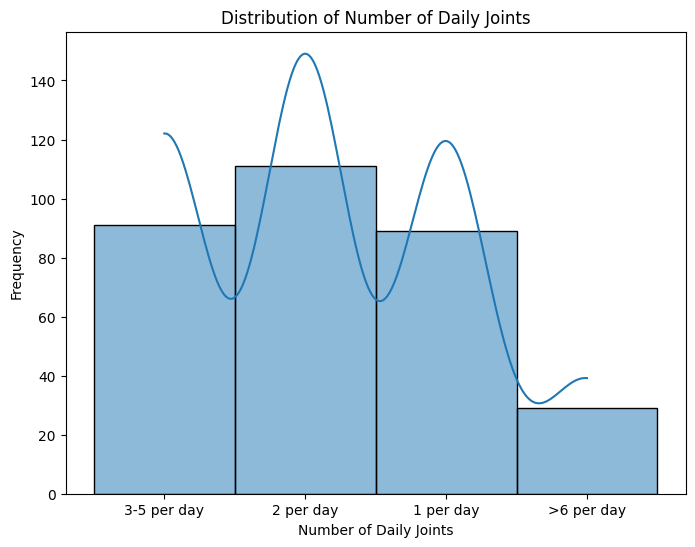

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Num daily joints'], kde=True)
plt.title('Distribution of Number of Daily Joints')
plt.xlabel('Number of Daily Joints')
plt.ylabel('Frequency')
plt.show()


The category "2 per day" has the highest frequency of individuals, indicating it is the most common number of daily joints smoked.

The least common frequency is for individuals who smoke more than 6 joints per day.

Categories "3-5 per day" and "1 per day" have similar frequencies, which are lower than the "2 per day" category but significantly higher than the ">6 per day" category.

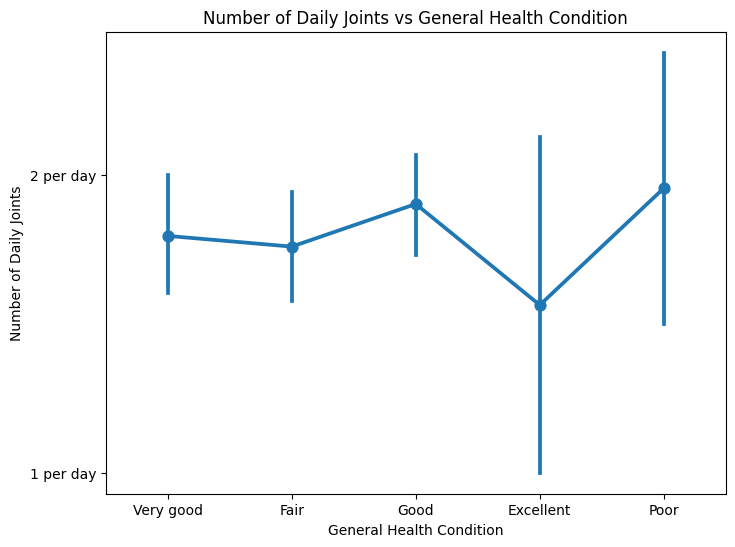

In [144]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='General health condition', y='Num daily joints', data=df)
plt.title('Number of Daily Joints vs General Health Condition')
plt.xlabel('General Health Condition')
plt.ylabel('Number of Daily Joints')
plt.show()


Individuals who report their health as "Excellent" smoke fewer joints on average, compared to other health categories.
Those with "Very good" and "Fair" health conditions report smoking a similar average number of joints, roughly between 1 to 2 per day.
There's a noticeable uptick in the average number of joints smoked by individuals who report their health as "Poor".
The error bars indicate significant variability in the number of joints smoked daily across individuals in each health category, especially in the "Poor" category.

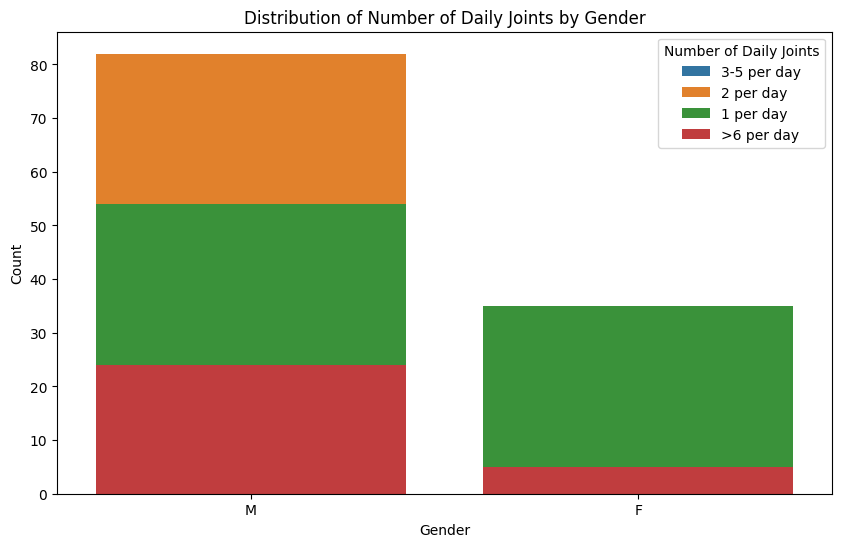

In [145]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Num daily joints', dodge=False)
plt.title('Distribution of Number of Daily Joints by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Number of Daily Joints')
plt.show()



Males (M) have higher counts across all categories of daily joint consumption compared to females (F).
For both genders, smoking "2 per day" is the most common frequency.

Males report smoking "3-5 per day" more often than females.

The "more than 6 per day" category is the least common for both genders, with males having a slightly higher count than females.

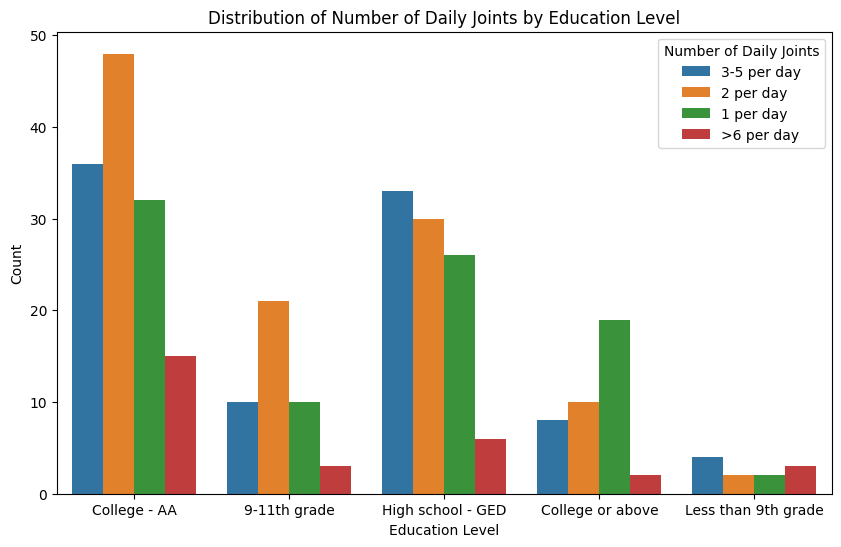

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education Level', hue='Num daily joints')
plt.title('Distribution of Number of Daily Joints by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Number of Daily Joints')
plt.show()



Individuals with a high school education or GED smoke 2 joints per day more frequently than other amounts.

The "College - AA" category has the highest count of individuals smoking 3-5 joints per day.

Those with "College or above" education tend to smoke 1 joint per day more than any other number.

The least educated group, "Less than 9th grade," has relatively low counts across all smoking frequencies but has the highest count for smoking more than 6 joints per day compared to other education levels.


In [147]:
import plotly.express as px

# Scatter plot
fig = px.scatter(df, x='Education Level', y='Num daily joints', color='Marital Status', hover_data=['Gender', 'Age_ranges'])
fig.show()

Data points are distributed uniformly across education levels for each frequency of daily joint smoking, indicating no clear trend between education level and daily joint consumption.

Each marital status category is represented at every education level and number of daily joints, suggesting marital status is also not distinctly associated with joint consumption as per this data.

The "3-5 per day" and "2 per day" categories appear to be the most common frequencies across all education levels.

Less frequent are data points for "more than 6 per day", which are present across most education levels for various marital statuses.

In [148]:
fig = px.line(df, x='Age_ranges', y='Num daily joints', color='Gender', line_group='Marital Status', hover_name='Participant_id')
fig.show()




There are distinct patterns where some individuals from both age ranges and genders report smoking "3-5" and "2 per day" as the most common frequencies.

The "1 per day" and ">6 per day" categories are less common for both genders in the presented age ranges.

Lines for males (in blue) and females (in red) intersect across different frequencies, indicating variation within gender groups for daily joint consumption across these age ranges.



#### **Merging the required dataframes for predicting the affect of frequency of alcohol on health**

In [48]:
alcohol_hs = imputed_hs.merge(imputed_alcohol, on='SEQN', how='inner')
alcohol_hs_demo = alcohol_hs.merge(imputed_demo, on='SEQN', how='inner')
alcohol_hs_demo_cardio = alcohol_hs_demo.merge(imputed_cardio, on='SEQN', how='inner')
alcohol_hs_demo_cardio

,SEQN,HSD010,ALQ130,ALQ141Q,ALQ151,ALQ120Q,RIDAGEYR,RIAGENDR,DMDEDUC2,DMDMARTL,CDQ001,CDQ002,CDQ003,CDQ008,CDQ010
0,62164.0,3.0,1.0,0.0,2.0,0.0,44.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0
1,62172.0,3.0,3.0,1.0,2.0,2.0,43.0,2.0,3.0,5.0,2.0,2.0,2.0,2.0,2.0
2,62174.0,4.0,1.0,0.0,2.0,0.0,80.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0
3,62177.0,3.0,1.0,0.0,2.0,0.0,51.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0
4,62178.0,4.0,1.0,0.0,2.0,0.0,80.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12926,102934.0,4.0,3.0,0.0,2.0,5.0,48.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0
12927,102946.0,3.0,1.0,0.0,2.0,0.0,65.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0
12928,102952.0,2.0,1.0,0.0,2.0,0.0,70.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0
12929,102953.0,4.0,12.0,6.0,2.0,6.0,42.0,1.0,3.0,4.0,1.0,2.0,2.0,1.0,2.0


#### **Modelling using Alcohol dataset**

In [ ]:
data = alcohol_hs_demo_cardio.astype('int')

label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in data.columns:
    # Apply label encoding only to columns with object dtype (categorical columns)
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])
        # Convert encoded values to pandas categorical type
        data[col] = data[col].astype('category')

In [ ]:
# selecting features and target variables
X = data.drop(['SEQN', 'ALQ151'], axis=1)
y = data['ALQ151']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Random Forest Classifier Accuracy: 0.8465403942790878
F1 Score: 0.8180693222356845


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
k_folds = 5

# Perform k-fold cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_accuracy = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1 = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')

# Print the results
print("Cross-Validation Results (Accuracy):")
print(cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())
print("\nCross-Validation Results (F1 Score):")
print(cv_f1)
print("Mean F1 Score:", cv_f1.mean())


Cross-Validation Results (Accuracy):
[0.85451909 0.84195263 0.85113581 0.85693572 0.84961315]
Mean Accuracy: 0.850831282083403

Cross-Validation Results (F1 Score):
[0.82318569 0.80520623 0.81507141 0.82594713 0.81667886]
Mean F1 Score: 0.8172178641841172


In [ ]:
# Create the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

AdaBoost Accuracy: 0.8662543486664089
F1 Score: 0.8220904236163811


In [ ]:
# Create the SVM Classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

SVM Accuracy: 0.8697332817935833
F1 Score: 0.8091378474407949


In [ ]:
#label encoding for XGBoost
xgb_data = data.copy()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

XGBoost Accuracy: 0.855817549284886
F1 Score: 0.8203268638237315


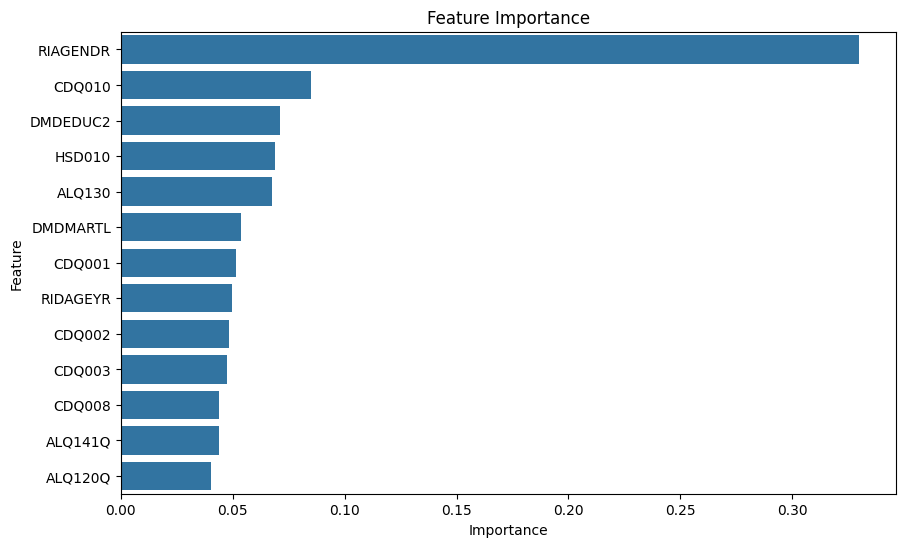

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
feature_importance = xgb_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


##### **Visualizations on the Alcohol Use dataset**

In [ ]:
imputed_alcohol.rename(columns = {'SEQN'     : 'Participant_id', 
                                 'ALQ120Q'  : 'Alcohol past 12 months',
                                 'ALQ130'   : 'Alcohol drinks/day',
                                 'ALQ141Q'  : 'Num days consuming 4/5 drinks',
                                 'ALQ151'   : '4+ drinks every day Y-N'
                            }, inplace=True)

In [ ]:
col_rename = ['Alcohol past 12 months',
                  'Num days consuming 4/5 drinks'
                  ]
    
for col in col_rename:
        imputed_alcohol[col] = imputed_alcohol[col].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                                          ['Never',
                                           'Every day',
                                           'Nearly every day',
                                           '3 to 4 times a week',
                                           '2 times a week',
                                           'Once a week',
                                           '2 to 3 times a month',
                                           'Once a month',
                                           '7 to 11 times in the last year',
                                           '3 to 6 times in the last year',
                                           '1 to 2 times in the last year'
                                        ])

In [ ]:
data = [imputed_demo, imputed_alcohol, imputed_hs, imputed_cardio]

In [ ]:


df = reduce(lambda  left,right: pd.merge(left,right,on=['Participant_id'], how='inner'), data)
df

,Participant_id,Gender,Education Level,Marital Status,Age_ranges,Alcohol drinks/day,4+ drinks every day Y-N,Alcohol past 12 months,Num days consuming 4/5 drinks,General health condition,Ever had chest pain Y-N,Chest pain walking uphill/hurry Y-N,Chest pain on level ground Y-N,Severe pain in chest more than half hour Y-N,Shortness of breath on stairs/inclines Y-N
0,62164.0,F,College - AA,Married,40-49,1.0,2.0,Never,Never,Good,0.0,0.0,0.0,0.0,0.0
1,62172.0,F,High school - GED,Never Married,40-49,3.0,2.0,Nearly every day,Every day,Good,0.0,0.0,0.0,0.0,0.0
2,62174.0,M,College or above,Married,80+,1.0,2.0,Never,Never,Fair,1.0,1.0,1.0,0.0,1.0
3,62177.0,M,High school - GED,Married,50-59,1.0,2.0,Never,Never,Good,0.0,0.0,0.0,0.0,0.0
4,62178.0,M,High school - GED,Widowed,80+,1.0,2.0,Never,Never,Fair,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12926,102934.0,M,High school - GED,Married,40-49,3.0,2.0,Once a week,Never,Fair,0.0,0.0,0.0,0.0,0.0
12927,102946.0,M,College - AA,Married,60-69,1.0,2.0,Never,Never,Good,0.0,0.0,0.0,0.0,1.0
12928,102952.0,F,High school - GED,Married,70-79,1.0,2.0,Never,Never,Very good,0.0,0.0,0.0,0.0,0.0
12929,102953.0,M,High school - GED,Separated,40-49,12.0,2.0,2 to 3 times a month,2 to 3 times a month,Fair,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.isnull().sum()

Participant_id                                  0
Gender                                          0
Education Level                                 0
Marital Status                                  0
Age_ranges                                      0
Alcohol drinks/day                              0
4+ drinks every day Y-N                         0
Alcohol past 12 months                          0
Num days consuming 4/5 drinks                   0
General health condition                        0
Ever had chest pain Y-N                         0
Chest pain walking uphill/hurry Y-N             0
Chest pain on level ground Y-N                  0
Severe pain in chest more than half hour Y-N    0
Shortness of breath on stairs/inclines Y-N      0
dtype: int64

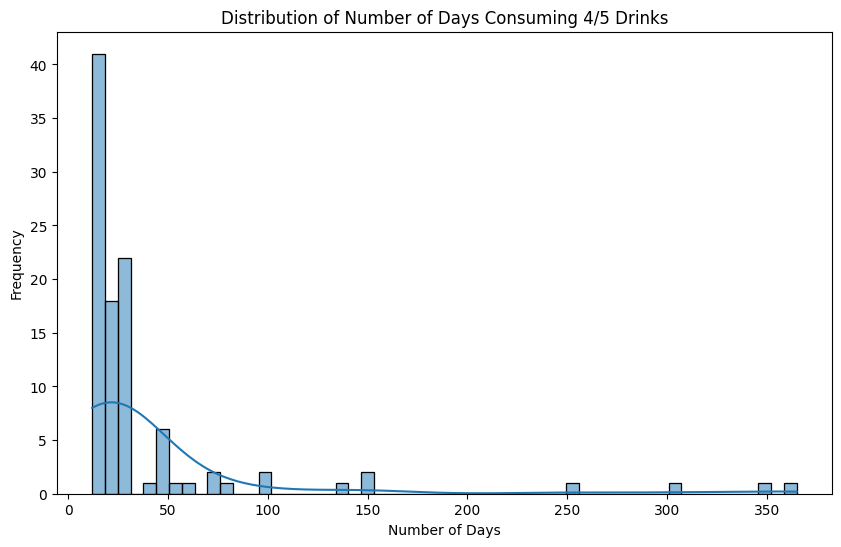

In [ ]:
# Convert the column to numeric (assuming non-numeric values are 'Never')
df['Num days consuming 4/5 drinks'] = pd.to_numeric(df['Num days consuming 4/5 drinks'], errors='coerce')

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Num days consuming 4/5 drinks'], kde=True)
plt.title('Distribution of Number of Days Consuming 4/5 Drinks')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()



A significant number of individuals consume 4 or 5 drinks on very few days, with the highest frequency concentrated at the lower end of the scale (close to 0 days).

There's a rapid decrease in frequency as the number of days increases, showing that fewer individuals consume 4 or 5 drinks on a larger number of days.

There are very few individuals who consume this amount of drinks on a number of days approaching the full year (365 days).

The distribution is right-skewed, indicating that most individuals consume 4 or 5 drinks infrequently throughout the year.


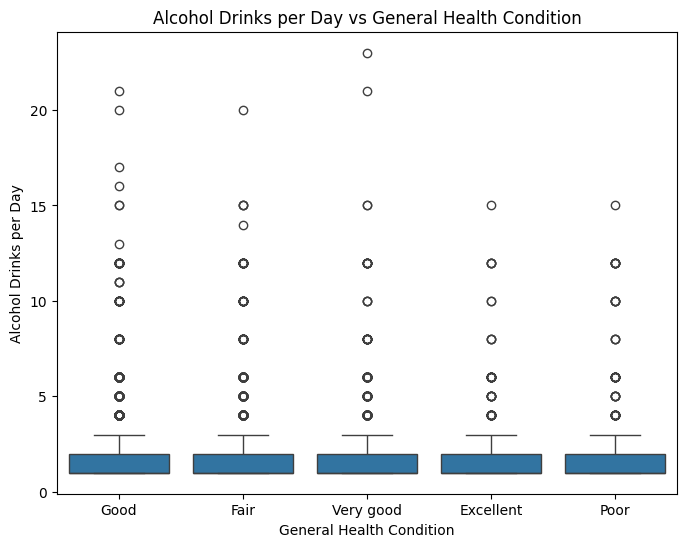

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='General health condition', y='Alcohol drinks/day', data=df)
plt.title('Alcohol Drinks per Day vs General Health Condition')
plt.xlabel('General Health Condition')
plt.ylabel('Alcohol Drinks per Day')
plt.show()




The graph suggests a positive relationship between alcohol consumption and general health condition.

Those reporting "Poor" health tend to consume more alcoholic drinks per day on average.

Individuals with "Excellent" or "Very good" health show lower average alcohol intake.

However, the significant variability within each health group indicates other contributing factors beyond just alcohol consumption.


In [ ]:
fig = px.histogram(df, x='Age_ranges', y='Num days consuming 4/5 drinks', color='Gender',
             title='Number of Days Consuming 4/5 Drinks by Age and Marital Status',
             labels={'Num days consuming 4/5 drinks': 'Number of Days Consuming 4/5 Drinks', 'Age_ranges': 'Age Range'})
fig.show()



Data points for both genders across various age ranges indicate that the number of days consuming 4/5 drinks varies widely within each group.

Both females (in blue) and males (in red) in the 40-49 age range show a broad range of days consuming 4/5 drinks, with some individuals reporting very high numbers.

In the 60-69 and 70-79 age ranges, there are fewer data points, suggesting fewer individuals report consuming 4/5 drinks, but there is still a significant range in the number of days reported.

For those 80 and over, the data points are limited and lower on the scale, indicating fewer days of consuming 4/5 drinks.


In [ ]:


# Group by marital status and calculate the average number of days consuming 4/5 drinks
avg_days_4_5_by_marital_status = df.groupby('Marital Status')['Num days consuming 4/5 drinks'].mean().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(avg_days_4_5_by_marital_status, x='Marital Status', y='Num days consuming 4/5 drinks',
             title='Average Number of Days Consuming 4/5 Drinks by Marital Status',
             labels={'Num days consuming 4/5 drinks': 'Average Number of Days Consuming 4/5 Drinks',
                     'Marital Status': 'Marital Status'},
             color='Marital Status')
fig.show()



Individuals who are widowed have the highest average number of days consuming 4/5 drinks.

Those living with a partner show the second-highest average, followed by individuals who are divorced.

Married and never married individuals report a lower average number of days, and those who are separated have the lowest average of days among the categories presented.

The chart indicates variability in drinking habits based on marital status, with widowed individuals standing out for their higher average number of days consuming 4/5 drinks.



In [ ]:
fig = px.bar(df, x='Education Level', y='Alcohol drinks/day', labels={'Alcohol drinks/day':'Average Alcohol Drinks per Day', 'Education Level':'Education Level'}, color='Education Level')
fig.update_layout(title='Average Alcohol Consumption by Education Level', coloraxis_showscale=False)
fig.show()

The chart illustrates the average alcohol consumption by education level. It indicates that individuals with a college degree or above tend to consume less alcohol on average compared to those with lower education levels. Those with less than a 9th-grade education show slightly higher average consumption, whereas individuals with some college or an associate degree (AA) fall in between the two extremes. The data suggests a trend where higher education levels may be associated with lower average alcohol consumption per day